In [ ]:
!pip install tpot

In [ ]:
# check tpot version
import tpot
print('tpot: %s' % tpot.__version__)

In [23]:
import TFX_NASA_handler as TFX

In [24]:
dirPath = './archive/CMaps/'
handler = TFX.TFX_NASA_Handler('tpot_test',dirPath)
train, test, y_test = handler.load_data()
handler.data_prep( train, test )

Data Prep Complete, columns dropped and smoothing applied


In [3]:
from tpot import TPOTClassifier
from tpot import TPOTRegressor




C:\Users\stuar\anaconda3\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


Optimization Progress:   0%|          | 0/600 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -438.8749624813072

Generation 2 - Current best internal CV score: -437.5826256581918

Generation 3 - Current best internal CV score: -437.5826256581918

Generation 4 - Current best internal CV score: -435.87635141214577

Generation 5 - Current best internal CV score: -435.462818294697

Best pipeline: ExtraTreesRegressor(MaxAbsScaler(SGDRegressor(input_matrix, alpha=0.001, eta0=1.0, fit_intercept=False, l1_ratio=0.25, learning_rate=invscaling, loss=huber, penalty=elasticnet, power_t=0.5)), bootstrap=True, max_features=0.3, min_samples_leaf=16, min_samples_split=14, n_estimators=100)


TPOTRegressor(generations=5, verbosity=2)

In [12]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
model_pred = tpot.predict(handler.X_test)
r2 = r2_score(y_test,model_pred)
RMSE = np.sqrt(mean_squared_error(y_test,model_pred))
print("RMSE: ", RMSE)
print("r-squared: ", r2)

RMSE:  19.837973332083354
r-squared:  0.7721048619279357


C:\Users\stuar\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(


In [13]:
y_trainC, y_testC = handler.rephrase_BinaryClassification(handler.y_train, y_test, limit = 30)

In [14]:
tpotC = TPOTClassifier(generations=5,verbosity=2)

tpotC.fit(handler.X_train,y_trainC)

Optimization Progress:   0%|          | 0/600 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9634040799384449

Generation 2 - Current best internal CV score: 0.9649553247644673

Generation 3 - Current best internal CV score: 0.9649553247644673

Generation 4 - Current best internal CV score: 0.9649553247644673

Generation 5 - Current best internal CV score: 0.9649553247644673

Best pipeline: MLPClassifier(RobustScaler(input_matrix), alpha=0.1, learning_rate_init=0.1)


TPOTClassifier(generations=5, verbosity=2)

Text(0.5, 1.0, 'Confusion Matrix - Tpot lib')

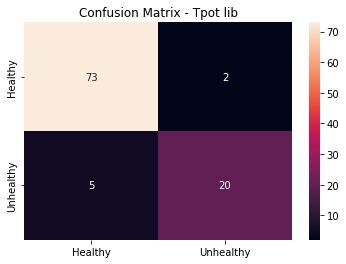

In [17]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, cohen_kappa_score
model_predC = tpotC.predict(handler.X_test)
cm = confusion_matrix(np.squeeze(y_testC), model_predC)
cmplot = sns.heatmap(cm,annot=True,xticklabels=["Healthy","Unhealthy"],yticklabels=["Healthy","Unhealthy"] )
cmplot.set_title("Confusion Matrix - Tpot lib")


In [35]:
import pandas as pd
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score,roc_auc_score

def binary_classification_performance(y_test, y_pred):
        tp, fp, fn, tn = confusion_matrix(y_test, y_pred).ravel()
        accuracy = round(accuracy_score(y_pred = y_pred, y_true = y_test),2)
        precision = round(precision_score(y_pred = y_pred, y_true = y_test),2)
        recall = round(recall_score(y_pred = y_pred, y_true = y_test),2)
        f1_score = round(2*precision*recall/(precision + recall),2)
        specificity = round(tn/(tn+fp),2)
        npv = round(tn/(tn+fn),2)
        auc_roc = round(roc_auc_score(y_score = y_pred, y_true = y_test),2)


        result = pd.DataFrame({'Accuracy' : [accuracy],
                             'Precision (or PPV)' : [precision],
                             'Recall (senitivity or TPR)' : [recall],
                             'f1 score' : [f1_score],
                             'AUC_ROC' : [auc_roc],
                             'Specificty (or TNR)': [specificity],
                             'NPV' : [npv],
                             'True Positive' : [tp],
                             'True Negative' : [tn],
                             'False Positive':[fp],
                             'False Negative':[fn]})
        return result

In [36]:
accu = np.mean( np.squeeze(y_testC)==model_predC)
accu

0.93

In [37]:
binary_classification_performance(y_testC, model_predC)

,Accuracy,Precision (or PPV),Recall (senitivity or TPR),f1 score,AUC_ROC,Specificty (or TNR),NPV,True Positive,True Negative,False Positive,False Negative
0,0.93,0.91,0.8,0.85,0.89,0.91,0.8,73,20,2,5
